<center><h1> Capstone: </h1><center>
    <br>
<br>
    
Daniela Martinez<br>
Data Science Student, Brainstation, 2024<br>
_______________________________________________________________________________
<h3> Wine Classification Prediction</h1>

### Table of Content
Part 0. <a href="#part-0">Overviewing and Cleaning Data</a> <br>
Part 1. <a href="#part-1">Exploratory Data Analysis</a> <br>
Part 2. <a href="#part-2">Statistical Analysis</a> <br>
Part 3. <a href="#part-3">Advanced Statistical Analysis</a> <br>

### Part 0 - Overviewing Data and Cleaning Data<a class="anchor" id="part-0"></a>

___

#### 1. Overviewing Data

#### Dataset
For this prediction two datasets are going to be used for these predictions, both are for public access.

One of them contains attributes related to Pesticides and Yield. This dataset was collected from [FAOSTAT](https://www.fao.org/faostat/en/#data/QCL)
The second dataset contains information related to Rainfall and Avg. Temperature. It was collected from the [World Data Bank](https://data.worldbank.org/indicator)





#### Data dictionary

Area: Country names that plant raw_yields<br>
Item: Types of crops planted<br>
Year: Time of planted crops in years 1990-2013<br>
average_rain_fall_mm_per_year: Average rain fall per year<br>
pesticides_tonnes: Pesticides used in tonnes per ha<br>
avg_temp: Average temperature (celsius)<br>
hg/ha_yield: Crops yield production value in hectogram per hectare (hg/Ha)

**Importing Packages**

In [211]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

#### 2. Loading data frames and Cleaning process

#### Loading dataset

In [212]:
# Importing the dataset
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
wine_q_raw = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
features = wine_q_raw.data.features
target = wine_q_raw.data.targets
  
# metadata 
print(wine_q_raw.metadata) 
  
# variable information 
print(wine_q_raw.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

#### Exploring datasets

In [213]:
features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [214]:
# basic EDA summary for target df
print(f"Total rows: {target.shape[0]}")
print(f"Total columns: {target.shape[1]}")
print(f"Null values: {target.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {target.T.duplicated()}")

Total rows: 6497
Total columns: 1
Null values: 0
----------
Duplicate columns: quality    False
dtype: bool


In [215]:
# basic EDA summary for features df
print(f"Total rows: {features.shape[0]}")
print(f"Total columns: {features.shape[1]}")
print(f"Null values: {features.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {features.T.duplicated()}")

Total rows: 6497
Total columns: 11
Null values: 0
----------
Duplicate columns: fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool


- Generating original dataset for visualizations

In [216]:
# Concatenating datasets
wine_concact = pd.concat([target, features], axis=1)

# Saving the merged dataset to a new CSV file
wine_concact.to_csv('data/wine_quality.csv', index=False)

In [217]:
wine_q_raw = pd.read_csv('data/wine_quality.csv')

In [218]:
wine_q_raw.head()

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,5,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,5,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,6,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [219]:
wine_q_raw.sample(5)

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
3495,6,7.5,0.29,0.67,8.1,0.037,53.0,166.0,0.99660,2.90,0.41,8.9
5810,6,7.1,0.38,0.42,11.8,0.041,32.0,193.0,0.99624,3.04,0.49,10.0
1774,6,6.9,0.23,0.40,7.5,0.040,50.0,151.0,0.99270,3.11,0.27,11.4
5285,5,7.6,0.30,0.37,1.6,0.087,27.0,177.0,0.99438,3.09,0.50,9.8
3416,4,7.2,0.50,0.00,0.8,0.034,46.0,114.0,0.99320,3.19,0.34,9.2


In [220]:
wine_q_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               6497 non-null   int64  
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [221]:
# basic EDA summary for wine df
print(f"Total rows: {wine_q_raw.shape[0]}")
print(f"Total columns: {wine_q_raw.shape[1]}")
print(f"Null values: {wine_q_raw.isna().sum().sum()}")
print(f'----------')
print (f"Duplicate columns: {wine_q_raw.T.duplicated()}")

Total rows: 6497
Total columns: 12
Null values: 0
----------
Duplicate columns: quality                 False
fixed_acidity           False
volatile_acidity        False
citric_acid             False
residual_sugar          False
chlorides               False
free_sulfur_dioxide     False
total_sulfur_dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
dtype: bool


- Duplicated entries

In [222]:
# Finding duplicated entries
duplicates = wine_q_raw[wine_q_raw.duplicated(keep=False)]

# Show duplicated entries
print("Original and Duplicate Entries:")
print(duplicates)

Original and Duplicate Entries:
      quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           5            7.4              0.70         0.00             1.9   
4           5            7.4              0.70         0.00             1.9   
9           5            7.5              0.50         0.36             6.1   
11          5            7.5              0.50         0.36             6.1   
22          5            7.9              0.43         0.21             1.6   
...       ...            ...               ...          ...             ...   
6450        5            6.4              0.33         0.44             8.9   
6454        6            7.1              0.23         0.39            13.7   
6455        6            7.1              0.23         0.39            13.7   
6478        6            6.6              0.34         0.40             8.1   
6479        6            6.6              0.34         0.40             8.1   

      chlorides  fr

In [223]:
# Count the total number of duplicated rows
total_duplicates = wine_q_raw.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = wine_q_raw.shape[0]

# Calculate the percentage of duplicate entries
percentage_duplicates = (total_duplicates / total_rows) * 100

# Print the percentage of duplicate entries
print("Percentage of duplicate entries:", percentage_duplicates)

Percentage of duplicate entries: 18.14683700169309


WARNING: Having more than 10% of duplicated entries is considered high, indicating the need for further exploration of the dataset before dropping entries. However, due to the lack of time to evaluate different models for predicting wine quality and the current number of entries exceeding 6000, these duplicated entries will be deleted.

In [224]:
# Drop duplicate entries from the DataFrame
wine_q_clean = wine_q_raw.drop_duplicates()

# Print the cleaned DataFrame
print("Cleaned DataFrame:")
print(wine_q_clean)

Cleaned DataFrame:
      quality  fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
0           5            7.4              0.70         0.00             1.9   
1           5            7.8              0.88         0.00             2.6   
2           5            7.8              0.76         0.04             2.3   
3           6           11.2              0.28         0.56             1.9   
5           5            7.4              0.66         0.00             1.8   
...       ...            ...               ...          ...             ...   
6492        6            6.2              0.21         0.29             1.6   
6493        5            6.6              0.32         0.36             8.0   
6494        6            6.5              0.24         0.19             1.2   
6495        7            5.5              0.29         0.30             1.1   
6496        6            6.0              0.21         0.38             0.8   

      chlorides  free_sulfur_dio

In [225]:
# Count the total number of duplicated rows
total_duplicates = wine_q_clean.duplicated().sum()

# Calculate the total number of rows in the DataFrame
total_rows = wine_q_clean.shape[0]

# Calculate the percentage of duplicate entries
percentage_duplicates = (total_duplicates / total_rows) * 100

# Print the percentage of duplicate entries
print("Percentage of duplicate entries:", percentage_duplicates)

Percentage of duplicate entries: 0.0


In [226]:
wine_q_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5318 non-null   int64  
 1   fixed_acidity         5318 non-null   float64
 2   volatile_acidity      5318 non-null   float64
 3   citric_acid           5318 non-null   float64
 4   residual_sugar        5318 non-null   float64
 5   chlorides             5318 non-null   float64
 6   free_sulfur_dioxide   5318 non-null   float64
 7   total_sulfur_dioxide  5318 non-null   float64
 8   density               5318 non-null   float64
 9   pH                    5318 non-null   float64
 10  sulphates             5318 non-null   float64
 11  alcohol               5318 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 540.1 KB


#### 3. Classifying quality

In [227]:
# Checking quality colum
wine_q_clean['quality'].unique()


array([5, 6, 7, 4, 8, 3, 9], dtype=int64)

Wines with a quality equal to or higher than 7 will be classified as high. Values lower than 7 in quality will be considered low quality. A new binary target column will be generated, where 1 represents high quality, and 0 represents low quality.

#### Creating a binary column for our target

In [228]:
# Apply the condition to generate the new column
wine_q_clean['class_quality'] = (wine_q_clean['quality'] >= 7).astype(int)

# Visualizing
wine_q_clean.sample(5)

,quality,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class_quality
1657,6,6.6,0.38,0.15,4.6,0.044,25.0,78.0,0.99310,3.11,0.38,10.2,0
2971,6,10.7,0.22,0.56,8.2,0.044,37.0,181.0,0.99800,2.87,0.68,9.5,0
3119,6,8.3,0.20,0.49,1.7,0.038,38.0,167.0,0.99390,3.05,0.37,10.1,0
1153,6,9.6,0.42,0.35,2.1,0.083,17.0,38.0,0.99622,3.23,0.66,11.1,0
5910,5,7.1,0.23,0.28,1.9,0.046,33.0,103.0,0.98997,3.12,0.31,12.0,0


In [229]:
wine_q_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5318 non-null   int64  
 1   fixed_acidity         5318 non-null   float64
 2   volatile_acidity      5318 non-null   float64
 3   citric_acid           5318 non-null   float64
 4   residual_sugar        5318 non-null   float64
 5   chlorides             5318 non-null   float64
 6   free_sulfur_dioxide   5318 non-null   float64
 7   total_sulfur_dioxide  5318 non-null   float64
 8   density               5318 non-null   float64
 9   pH                    5318 non-null   float64
 10  sulphates             5318 non-null   float64
 11  alcohol               5318 non-null   float64
 12  class_quality         5318 non-null   int32  
dtypes: float64(11), int32(1), int64(1)
memory usage: 560.9 KB


In [284]:
# Dropping off original colum
wine_class = wine_q_clean.drop('quality', axis=1)#, inplace=True)
wine_class.sample()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class_quality
446,12.5,0.38,0.6,2.6,0.081,31.0,72.0,0.9996,3.1,0.73,10.5,0


In [231]:
wine_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5318 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         5318 non-null   float64
 1   volatile_acidity      5318 non-null   float64
 2   citric_acid           5318 non-null   float64
 3   residual_sugar        5318 non-null   float64
 4   chlorides             5318 non-null   float64
 5   free_sulfur_dioxide   5318 non-null   float64
 6   total_sulfur_dioxide  5318 non-null   float64
 7   density               5318 non-null   float64
 8   pH                    5318 non-null   float64
 9   sulphates             5318 non-null   float64
 10  alcohol               5318 non-null   float64
 11  class_quality         5318 non-null   int32  
dtypes: float64(11), int32(1)
memory usage: 519.3 KB


#### Class Distribution

- Count per class

In [232]:
# Check class proportions
class_distribution = wine_class['class_quality'].value_counts(normalize=True)
print(class_distribution)

class_quality
0    0.810455
1    0.189545
Name: proportion, dtype: float64


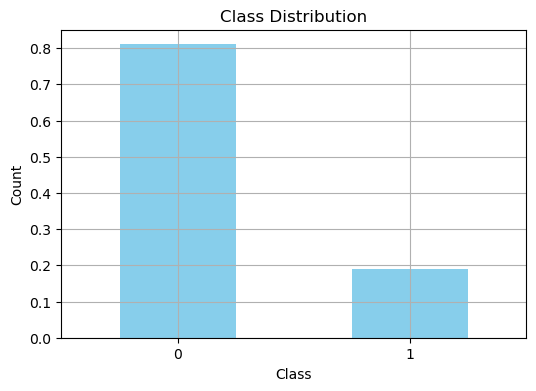

In [233]:
# Plotting class distribution
plt.figure(figsize=(6, 4))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

This dataset apparently describes more chemically low-quality wines (81.04%) than high-quality wines (18.95%). The counts per class suggest that the data is not balanced. The next step will be to balance the classes.

### Part 1 - Exploratory Data Analysis<a class="anchor" id="part-a"></a>

___

#### 1. Distribution of the dataset

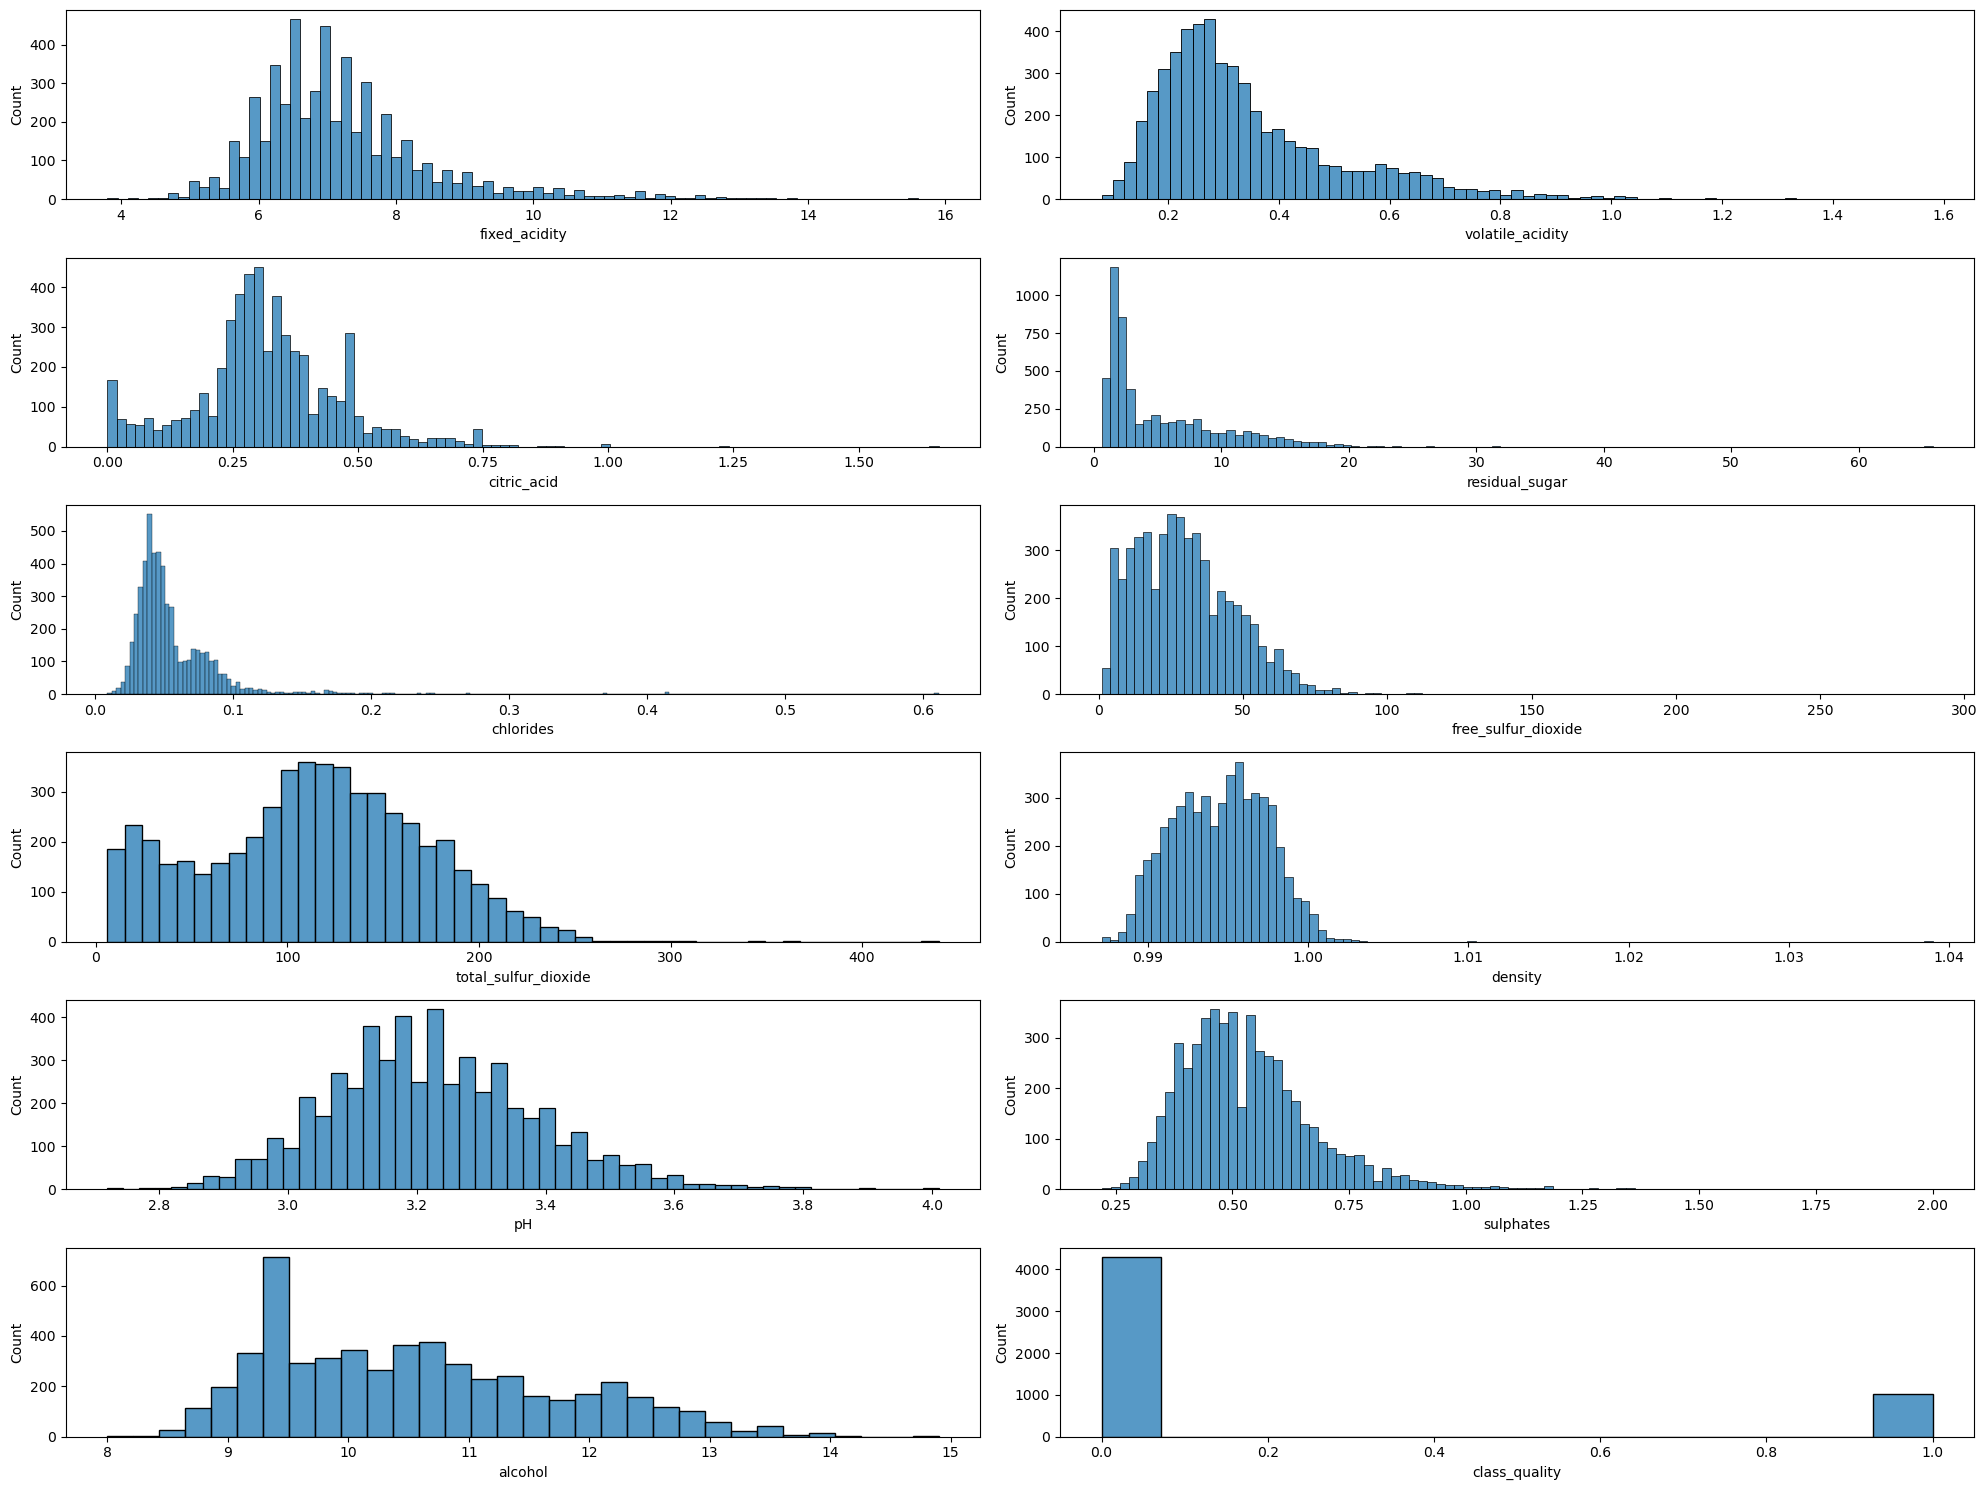

In [234]:
# Visualize distribution of unscaled data in each feature
col_names = wine_class.columns
plot_num = 1

plt.subplots(6,2, figsize=(20,15))

for col in wine_class:
    plt.subplot(6,2,plot_num)
    sns.histplot(wine_class[col])
    plot_num +=1

plt.tight_layout()
plt.show()

Observations:
- The data contained in each feature display normalized data.<br>
- The one binary column is our target (class_quality).<br>
- The target is either 1 (high quality) or 0 (low quality), so this will be a binary classification problem.
The data will be scaled, and different scalers will be implemented to observe their effects on each model.

#### 2. Histogram

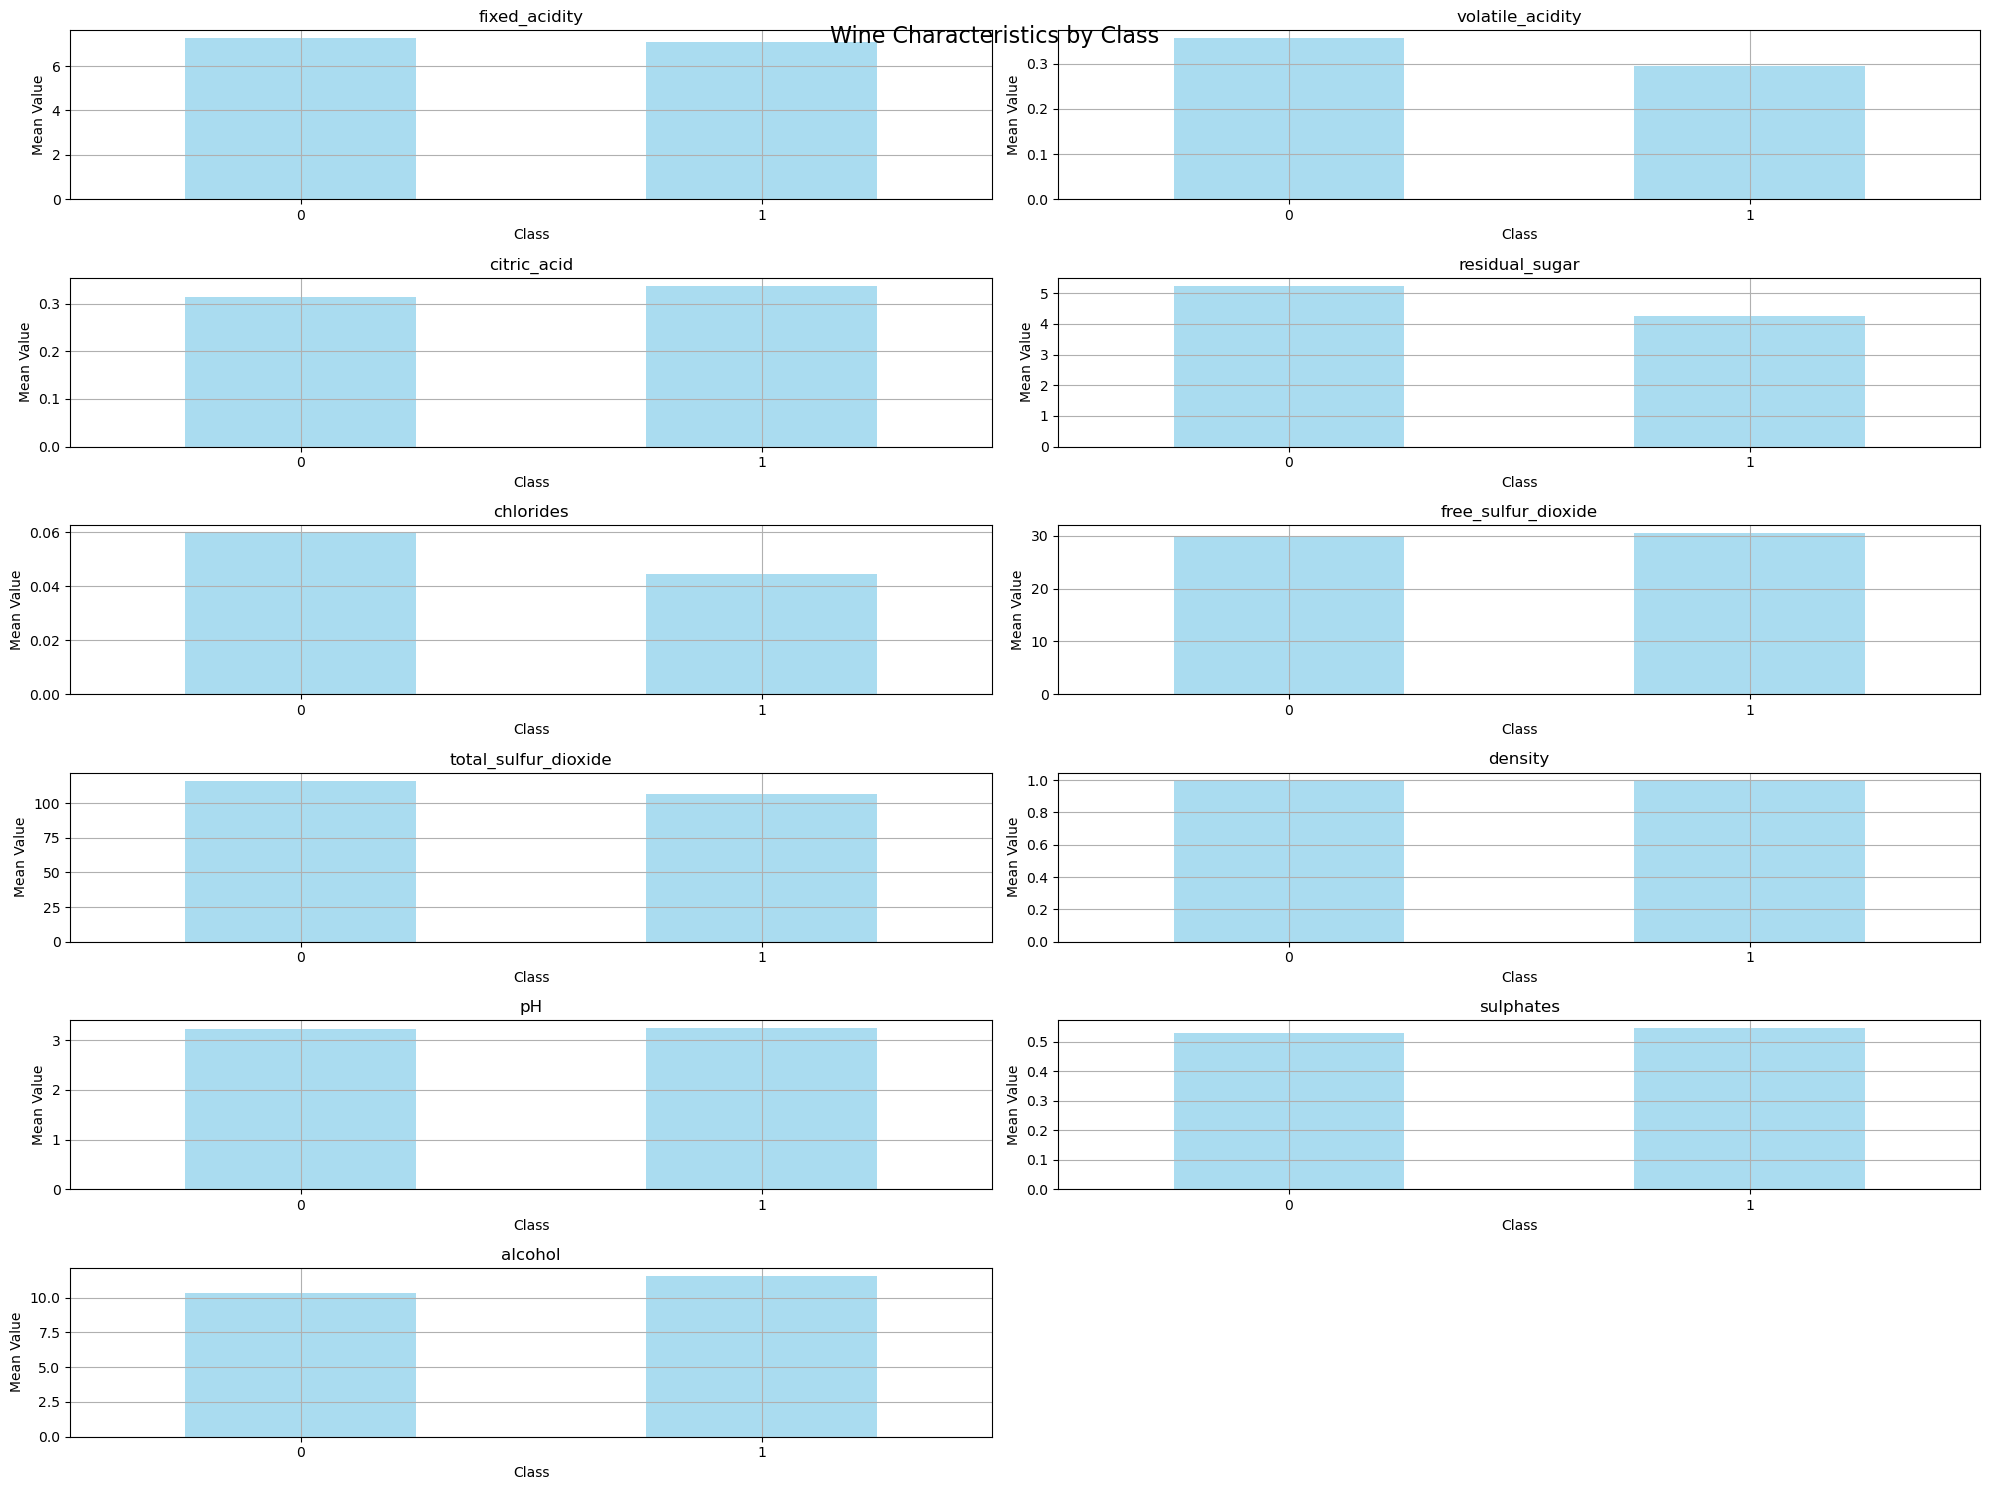

In [235]:
# Define the columns to plot (exclude 'class')
columns_to_plot = list(wine_class.columns)
columns_to_plot.remove('class_quality')

# Plotting
plt.figure(figsize=(20,15))

# Loop through each column and create a grouped bar plot
for i, col in enumerate(columns_to_plot):
    plt.subplot(6, 2, i+1)  # Adjust the subplot layout as needed
    wine_class.groupby('class_quality')[col].mean().plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title(col)
    plt.grid(True)
    plt.xlabel('Class')
    plt.ylabel('Mean Value')
    plt.xticks(rotation=0)
    plt.tight_layout()

plt.suptitle('Wine Characteristics by Class', fontsize=16)
plt.show()

Differences in each feature between high or low quality wine classification are mild. The largest differences in wine characteristcs were in 'volatile_acidity', 'residual_sugar', 'chlorides', and 'alcohol'.

#### 3. Crorrelation between variables

Let's establish potential correlations between variables.

#### Heatmap

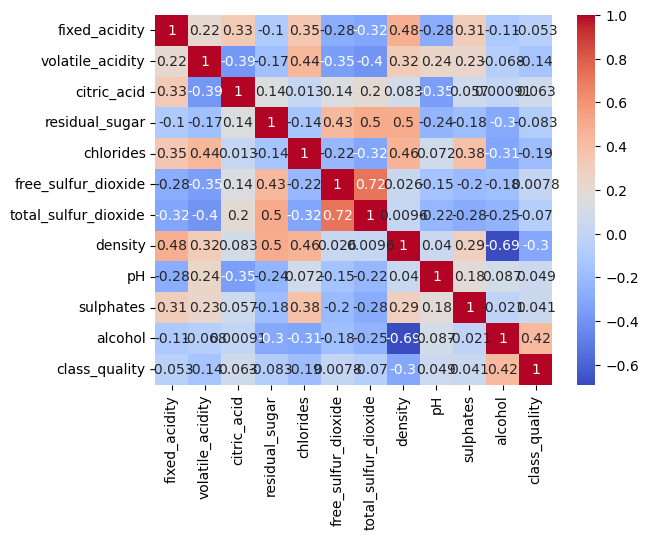

In [236]:
# Creating correlation matrix
cropcorre = wine_class.copy()

# Assuming cropcorre is your DataFrame
#categorical_columns = cropcorre.select_dtypes(include=['object']).columns.tolist()
numeric_columns = cropcorre.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in numeric_columns:
    cropcorre[column] = label_encoder.fit_transform(cropcorre[column])

# Plot the heatmap
sns.heatmap(cropcorre.corr(), annot=True, cmap='coolwarm')

# Show the plot
plt.show()

There are a high correlation between:
- alcohol and density (0.69),<br>
- free_sulfur_dioxide and total_sulfur_dioxide (0.72): expected since the presence of one of the means the absence of the other one,<br>
- residual_sugar and density (0.5),<br>
- fixed_acidity and density (0.48)

Most of the components analyzed will contribute to the overall density of the wine. So that correlation between variables and density will be high.

### Part 2 - Pre-processing Data<a class="anchor" id="part-0"></a>

___

#### 1. Importing Packages

In [237]:
# hide warnings - we will be using default parameter values
import warnings
warnings.filterwarnings('ignore')

In [238]:
# Splitting data
from sklearn.model_selection import train_test_split 

# Scalers
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

#### 2. Defining target and independent variables

In [239]:
wine_class.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'class_quality'],
      dtype='object')

In [240]:
# Independent variable
X = wine_class.drop(['class_quality'], axis=1)

# Dependent variable
y = wine_class['class_quality']

# Checking
display(X)
print(y)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


0       0
1       0
2       0
3       0
5       0
       ..
6492    0
6493    0
6494    0
6495    1
6496    0
Name: class_quality, Length: 5318, dtype: int32


In [241]:
# Check the shapes
print("Subset dimensions:")
print (f'The shape of the dependent variable (y): {y.shape}')
print (f'The shape of the independent variables (X): {X.shape}')

Subset dimensions:
The shape of the dependent variable (y): (5318,)
The shape of the independent variables (X): (5318, 11)


In [242]:
# inspecting range of values for each
stats = wine_class.describe()
stats.loc[['min','max']]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class_quality
min,3.8,0.08,0.00,0.6,0.009,1.0,6.0,0.98711,2.72,0.22,8.0,0.0
max,15.9,1.58,1.66,65.8,0.611,289.0,440.0,1.03898,4.01,2.00,14.9,1.0


The values in each variable clearly exist on different ranges.

#### 3. Splitting Data

In [243]:
# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Check 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3988, 11) (1330, 11) (3988,) (1330,)


#### 4. Scalling Data

#### MinMaxScaler():
Keeps distribution, and scales your data to a range of [0,1]. It can perform better than the Standard Scaler when your features have non-normal distributions. It does not create distorting of the actual distribution, instead reduces the range to be between 0 and 1.

In [244]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the train data. Computes the min and max for each feature
scaler = scaler.fit(X_train) # do not scale target variable

# Fit the scaler and transform both data subsets
X_train_mm=scaler.transform(X_train)
X_test_mm=scaler.transform(X_test)

X_train_mm_df=pd.DataFrame(X_train_mm)

#### Standard Scaler(): 

It works better with normal distributions, such as Linear/Logistic regression. The standard scaler does distort relative distances slightly, which is probably the best choice based on the data observation from the histograms.

In [245]:
# Initialize the Standard Scaler
scaler=StandardScaler()

# Fit the scaler to the train data. Computes the min and max for each feature
scaler=scaler.fit(X_train)

# Fit the scaler and transform both data subsets
X_train_ss=scaler.transform(X_train)
X_test_ss=scaler.transform(X_test)


X_train_ss_df=pd.DataFrame(X_train_ss)

#### Robust Scaler():
It is much more resilient to the presence of a large number of outliers in the original distribution. There were no noticeable outliers observed when plotting the features.

In [246]:
# Initialize the MinMaxScaler
scaler=RobustScaler()

# Fit the scaler to the train data. Computes the min and max for each feature
scaler=scaler.fit(X_train)

# Fit the scaler and transform both data subsets
X_train_rob=scaler.transform(X_train)
X_test_rob=scaler.transform(X_test)

X_train_rob_df=pd.DataFrame(X_train_rob)

### Part 3 - Training Models<a class="anchor" id="part-0"></a>

___

#### 1. Logistic Regression

#### Fitting Logistic Regression model to MinMaxScaler() scaled data

- Checking running time and **C** Values

In [247]:
start = time.time()

# The C_values to try
C_values = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

# Empty lists to append train and test accuracy scores to
train_acc_mm = []
test_acc_mm = []

# Loop through the different C values
for C in C_values:

    # Instantiate the model, increase max_iter to 1000
    logit = LogisticRegression(C = C, max_iter = 1000, random_state = 42)

    # Fit the model
    logit.fit(X_train_mm, y_train)

    # Score the model
    train_acc_mm.append(logit.score(X_train_mm,y_train))
    test_acc_mm.append(logit.score(X_test_mm, y_test))

stop = time.time()
runtime_logit_mm = stop-start
print(f"Runtime: {round(runtime_logit_mm,2)} seconds")

Runtime: 1.6 seconds


A very fast process.

- Accuracy scores for the different **C** values:

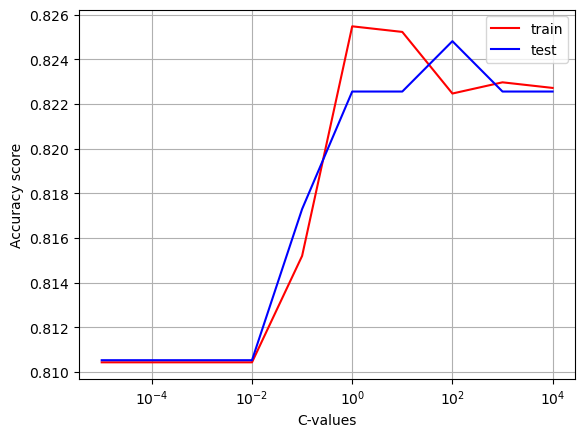

In [248]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_mm, c='red', label='train')
plt.plot(C_values, test_acc_mm, c='blue', label='test')
plt.xscale('log')

# Labels
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid(True)
plt.show()

Between 0.1 (10<sup>-1</sup>) and 1 (10<sup>0</sup>) the model overfit.

At C-values = 100 (10<sup>2</sup>) test accuracy is higher (0.826) compared to the training set (0.823), this could indicate that the model is generalizing well and not overfitting to the training data. A lower accuracy on the training set suggests that the model might not be fitting the training data as closely.

However,the best **C**-value to considere based on the graphic above would be 100 (10<sup>3</sup>) because the plot level at this point, and the train and test accuracy scores are closest.

- Accuracy Tests

In [249]:
# Getting our best Logistic Regression
# Instantiate the model
logit_mm = LogisticRegression(C = 100, max_iter = 1000, random_state = 42)

# Fit the model
logit_mm.fit(X_train_mm, y_train)

# Store accuracy scores
logit_mm_train = logit_mm.score(X_train_mm, y_train)
logit_mm_test = logit_mm.score(X_test_mm, y_test)

# Score the model
print(f"Train Accuracy: {logit_mm_train}")
print(f"Test Accuracy: {logit_mm_test}")

Train Accuracy: 0.8224674022066198
Test Accuracy: 0.824812030075188


Based on the score analysis this model is performing well despite the high train accuracy because there is a very small gap between the training and the test accuracies. This suggest a low risk of overfitting.

A value of 0.822 in training accuracy means that the model learned the training data effectively. While a higher test accuracy of 0.824 means that the model predicted well all instances in the test dataset.

In general this model performed really well at generalizing to new and unseen data, and on each of the 5 folders.

In [252]:
scores_df=pd.DataFrame(columns=['model','scaler','train','test', 'runtime', 'C-values', 'K-values', 'n_estimators', 'max_depth'])

scores_df.loc[scores_df.shape[0],:]=['Logistic','MinMaxScaler',logit_mm_train,logit_mm_test, round(runtime_logit_mm,2), '100', '-----', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,1.6,100,-----,-----,-----


#### Fitting Logistic Regression model to StandarScaler() scaled data

- Checking running time

In [253]:
start = time.time()

# Empty lists to append the training and test accuracy scores to
train_acc_ss = []
test_acc_ss = []

# Loop through the same C values
for C in C_values:

    # Instantiate the model
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train_ss, y_train)

    # Score the model
    train_acc_ss.append(logit.score(X_train_ss, y_train))
    test_acc_ss.append(logit.score(X_test_ss, y_test))

stop = time.time()
runtime_logit_ss = stop-start
print(f"Runtime: {round(runtime_logit_ss,2)} seconds")

Runtime: 0.71 seconds


- Accuracy scores for the different **C** values:

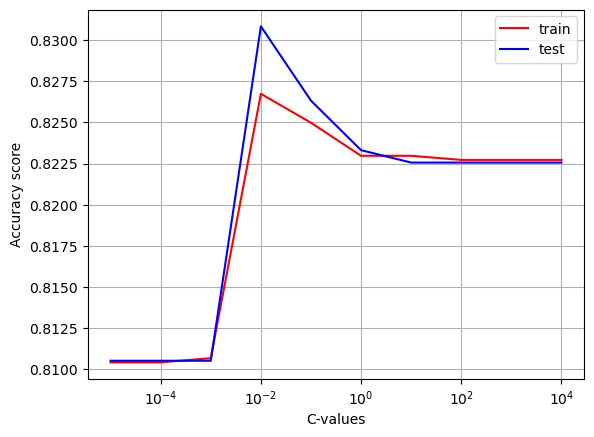

In [254]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_ss, c='red', label='train')
plt.plot(C_values, test_acc_ss, c='blue', label='test')
plt.xscale('log')

# Labels
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid(True)
plt.show()

The best value for **C** based on the graphic above is 1 (10<sup>0</sup>) because the plot level at this point, the train and test accuracy scores are closest, and the test accuracy performed the best over train accuracy.


- Accuracy Tests

In [255]:
# Getting our best Logistic Regression
# Instantiate the model
logit_ss = LogisticRegression(C = 1, max_iter = 1000, random_state = 42)

# Fit the model
logit_ss.fit(X_train_ss, y_train)

# Store accuracy scores
logit_ss_train = logit_ss.score(X_train_ss, y_train)
logit_ss_test = logit_ss.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {logit_ss_train}")
print(f"Test Accuracy: {logit_ss_test}")

Train Accuracy: 0.8229689067201604
Test Accuracy: 0.8233082706766918


Fitting the Logistic Regression on scaled data using StandardScaler() had a slightly better scores than using the MinMaxScaler(). The model achieved high accuracy both on the training data (82.29%) and the test accuracy (82.33%). This suggest that the model effectively learned from the training data to generalize on the new unseen data (test data).

- Pipeline and Cross Validation

In [256]:
estimators = [
    ('scaler',StandardScaler()),
    ('model', LogisticRegression(C=1))
]

my_pipe = Pipeline(estimators)

In [257]:
# Perform cross-validation
cv_scores = cross_val_score(my_pipe, X_train, y_train, cv=5) #cv=5 is a commonly used technique providing good estimates. Each fold contains 20% of the dataset.

# Compute the average validation score
avg_val_score = np.mean(cv_scores)

print("Avg cross-validation score for Logistic Regression with Standardized Data:", avg_val_score)

# Print the cross-validation scores
print("Cross-validation scores:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

Avg cross-validation score for Logistic Regression with Standardized Data: 0.8229683367766972
Cross-validation scores:
Fold 1: 0.8283
Fold 2: 0.8208
Fold 3: 0.8221
Fold 4: 0.8156
Fold 5: 0.8281


In [258]:
scores_df.loc[scores_df.shape[0],:]=['Logistic','Standard',logit_ss_train,logit_ss_test, round(runtime_logit_ss,2), '1','-----', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,1.6,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.71,1,-----,-----,-----


This Model performed slightly better using MinMaxScaler().


#### Fitting Logistic Regression model to RobustScaler() scaled data

- Checking for running time

In [259]:
start = time.time()

# Empty lists to append the training and test accuracy scores to
train_acc_rob = []
test_acc_rob = []

# Loop through the same C values
for C in C_values:

    # Instantiate the model
    logit=LogisticRegression(C=C, max_iter=1000, random_state=42)

    # Fit the model
    logit.fit(X_train_rob, y_train)

    # Score the model
    train_acc_rob.append(logit.score(X_train_rob, y_train))
    test_acc_rob.append(logit.score(X_test_rob, y_test))

stop = time.time()
runtime_logit_rob = stop-start
print(f"Runtime: {round(runtime_logit_rob,2)} seconds")

Runtime: 0.79 seconds


- Accuracy scores for the different **C** values:
    

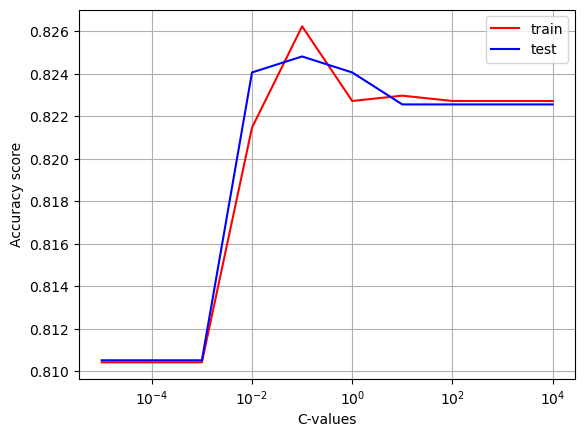

In [260]:
# visualize accuracies for different C-values
plt.figure()
plt.plot(C_values, train_acc_rob, c='red', label='train')
plt.plot(C_values, test_acc_rob, c='blue', label='test')
plt.xscale('log')

# Labels
plt.xlabel('C-values')
plt.ylabel('Accuracy score')
plt.legend()
plt.grid(True)
plt.show()

The best value for **C** based on the graphic above is 1 (10<sup>1</sup>) because the plot level at this point.

- Accuracy Tests

In [261]:
# Getting our best Logistic Regression
# Instantiate the model
logit_rob = LogisticRegression(C = 10, max_iter = 1000, random_state = 42)

# Fit the model
logit_rob.fit(X_train_rob, y_train)

# Store accuracy scores
logit_rob_train = logit_rob.score(X_train_rob, y_train)
logit_rob_test = logit_rob.score(X_test_rob, y_test)

# Score the model
print(f"Train Accuracy: {logit_rob_train}")
print(f"Test Accuracy: {logit_rob_test}")

Train Accuracy: 0.8229689067201604
Test Accuracy: 0.8225563909774436


This model shows high accuracy as well for both training and test and not overfitting when analyzing accuracy score.



In [262]:
# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5) #cv=5 is a commonly used technique providing good estimates. Each fold contains 20% of the dataset.

# Compute the average validation score
avg_val_score = np.mean(cv_scores)

print("Avg cross-validation score for Logistic Regression with Standardized Data:", avg_val_score)

# Print the cross-validation scores
print("Cross-validation scores:")
for i, score in enumerate(cv_scores, start=1):
    print(f"Fold {i}: {score:.4f}")

Avg cross-validation score for Logistic Regression with Standardized Data: 0.8184576875060927
Cross-validation scores:
Fold 1: 0.8308
Fold 2: 0.8058
Fold 3: 0.8095
Fold 4: 0.8055
Fold 5: 0.8407


In [263]:
scores_df.loc[scores_df.shape[0],:]=['Logistic','Robust',logit_rob_train,logit_rob_test, round(runtime_logit_rob,2), '1','-----', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,1.6,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.71,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.79,1,-----,-----,-----


In [264]:
scores_df.loc[scores_df.shape[0],:]=['-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,1.6,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.71,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.79,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----


#### Pipeline

In [265]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Define the pipeline with a list of model implemented and different scalers 
pipelines = [
    ('MinMax + Logistic Regression', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Standard + Logistic Regression', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])),
    ('Robust + Logistic Regression', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', LogisticRegression())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + Logistic Regression': {
        'classifier__C': [0.1, 1.0, 10.0,100]  # LogisticRegression regularization parameter (C)
    },
    'Standard + Logistic Regression': {
        'classifier__C': [0.1, 1.0, 10.0,100]    # LogisticRegression regularization parameter (C)
    },
    'Robust + Logistic Regression': {
        'classifier__C': [0.1, 1.0, 10.0,100]           # LogisticRegression regularization parameter (C)
    }
}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------")

Pipeline: MinMax + Logistic Regression
Best Parameters: {'classifier__C': 1.0}
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1078
           1       0.57      0.26      0.36       252

    accuracy                           0.82      1330
   macro avg       0.71      0.61      0.63      1330
weighted avg       0.79      0.82      0.79      1330

---------------------------------------------
Pipeline: Standard + Logistic Regression
Best Parameters: {'classifier__C': 0.1}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1078
           1       0.58      0.32      0.41       252

    accuracy                           0.83      1330
   macro avg       0.72      0.63      0.65      1330
weighted avg       0.80      0.83      0.81      1330

---------------------------------------------


Pipeline: Robust + Logistic Regression
Best Parameters: {'classifier__C': 0.1}
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1078
           1       0.57      0.31      0.40       252

    accuracy                           0.82      1330
   macro avg       0.71      0.63      0.65      1330
weighted avg       0.80      0.82      0.80      1330

---------------------------------------------


Using RobustScaler() resulted in similar accuracy scores for both train and test sets, with lower runtime. Outliers were not evaluated in this dataset, suggesting that it may not contain many outliers that could mislead the predictions using this model.

In conclusion, MinMaxScaler and RobustScaler showed similar results, effectively generalizing to unseen data like StandardScaler.

Based on all previous observations, StandardScaler() in logistic regression is the best model for this dataset compared to the same model using different scalers. This is not only because its accuracy was higher (83%).

However, the F1 score for Class 0 (low quality) was 0.9, indicating that the classifier performs well in correctly identifying instances of this class. In contrast, the F1 score for Class 1 (high quality) was 0.41, a low value, which suggests that the classifier struggled to correctly identify a significant portion of actual Class 1 instances.

In conclusion, the imbalance in F1-scores between the two classes highlights potential issues related to class imbalance, where the classifier may struggle to generalize effectively for the minority class. Data needs to be balanced before training.

#### 2. K Nearest Neighbor

#### Fitting KNN model to unscaled data

- Checking running time

In [266]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50)

# Empty lists to append the accuracies to
train_acc = []
test_acc = []

# Loop through neighbors
for K in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=K)

    # Fit the model
    knn.fit(X_train, y_train)

    # Score the model
    train_acc.append(knn.score(X_train, y_train))
    test_acc.append(knn.score(X_test, y_test))

stop = time.time()
runtime_knn = stop-start
print(f"Runtime: {round(runtime_knn,2)} seconds")

Runtime: 29.11 seconds


- Accuracy

In [267]:
# instantiate 'vanilla' model
k_neighbors = KNeighborsClassifier() 

# fit model on unscaled data
knn = k_neighbors.fit(X_train, y_train)
# train accuracy
knn_unsc_train_acc = knn.score(X_train, y_train)
# test accuracy
knn_unsc_test_acc = knn.score(X_test, y_test)

print("---Unscaled data---")
print(f"Training accuracy: {knn_unsc_train_acc}")
print(f"TEST accuracy: {knn_unsc_test_acc}")

---Unscaled data---
Training accuracy: 0.8465396188565697
TEST accuracy: 0.7804511278195488


In [268]:
scores_df.loc[scores_df.shape[0],:]=['KNN','Unscaled',knn_unsc_train_acc,knn_unsc_test_acc,round(runtime_knn,2),'-----', 'k', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,1.6,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.71,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.79,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,29.11,-----,k,-----,-----


#### Fitting KNN model to normalized data with MinMaxScaler()

- Checking running time and **K**-Values

In [269]:
start = time.time()

# The different K values to try out and save to 'neighbors'
neighbors = range(1, 50)

# Empty lists to append the accuracies to
train_acc_mm = []
test_acc_mm = []

# Loop through neighbors
for K in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=K)

    # Fit the model
    knn.fit(X_train_mm, y_train)

    # Score the model
    train_acc_mm.append(knn.score(X_train_mm, y_train))
    test_acc_mm.append(knn.score(X_test_mm, y_test))

stop = time.time()
runtime_knn_mm = stop-start
print(f"Runtime: {round(runtime_knn_mm,2)} seconds")

Runtime: 57.35 seconds


- Accuracy

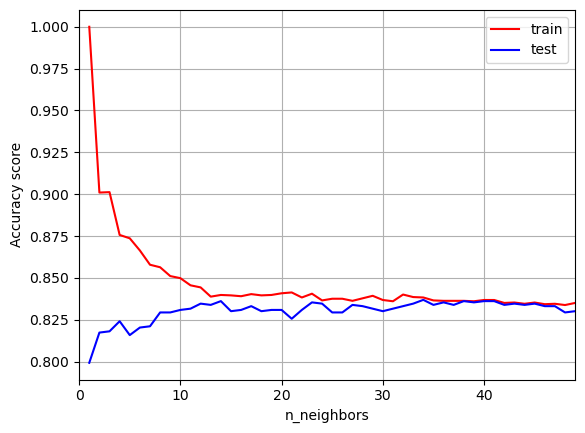

In [270]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_mm, c='red', label='train')
plt.plot(neighbors, test_acc_mm, c='blue', label='test')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.grid(True)
plt.legend()
plt.xlim(0, max(neighbors))  # Adjust the x-axis limits
plt.show()

This model shows overfitting with values of K between 0 and 12. The highest accuracy values for training and test data without overfitting were between k = 37 and k = 47.

Different k-values were tested and 42 gave the better accuracy values.

**Checking Accuracy with k = 42**

In [271]:
# KNN that performed best on scaled data
# Instantiate the model
knn_mm = KNeighborsClassifier(n_neighbors=42)

# Fit the model
knn_mm.fit(X_train_mm, y_train)

# Store accuracy scores
knn_mm_train = knn_mm.score(X_train_mm, y_train)
knn_mm_test = knn_mm.score(X_test_mm, y_test)

# Score the model
print(f"Train Accuracy: {knn_mm_train}")
print(f"Test Accuracy: {knn_mm_test}")

Train Accuracy: 0.8350050150451354
Test Accuracy: 0.8338345864661654


In [272]:
scores_df.loc[scores_df.shape[0],:]=['KNN','MinMax',knn_mm_train,knn_mm_test, round(runtime_knn_mm,2), '-----', '42', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,1.6,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.71,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.79,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,29.11,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,57.35,-----,42,-----,-----


#### Fitting KNN model to normalized data with StandardScaler()

- Checking running time and **n_neighbors-values**

In [273]:
start = time.time()

# Empty lists to append to
train_acc_ss = []
test_acc_ss = []

# Loop through the neighbors
for k in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train_ss, y_train)

    # Score the model
    train_acc_ss.append(knn.score(X_train_ss, y_train))
    test_acc_ss.append(knn.score(X_test_ss, y_test))

stop = time.time()
runtime_knn_ss = stop-start
print(f"Runtime: {round(runtime_knn_ss,2)} seconds")

Runtime: 57.24 seconds


- Accuracy

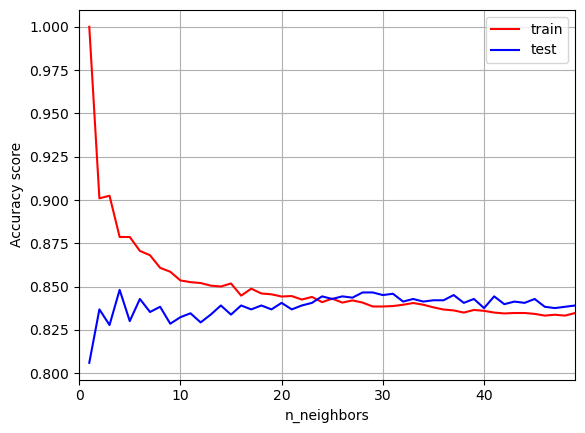

In [274]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_ss, c='red', label='train')
plt.plot(neighbors, test_acc_ss, c='blue', label='test')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.grid(True)
plt.xlim(0, max(neighbors))  # Adjust the x-axis limits
plt.show()

The graphic above shows overfitting between k = 1 and k = 15. However, the model demonstrates effective learning to analyze unseen data after using k-values higher than 25, where both the accuracy level and test accuracy perform well."

After evaluating values between 30 and 50, the best accuracy values was n_neighbors = 30.

In [275]:
# KNN that performed best on scaled data
# Instantiate the model
knn_ss = KNeighborsClassifier(n_neighbors=30)

# Fit the model
knn_ss.fit(X_train_ss, y_train)

# Store accuracy scores
knn_ss_train = knn_ss.score(X_train_ss, y_train)
knn_ss_test = knn_ss.score(X_test_ss, y_test)

# Score the model
print(f"Train Accuracy: {knn_ss_train}")
print(f"Test Accuracy: {knn_ss_test}")

Train Accuracy: 0.8385155466399198
Test Accuracy: 0.8451127819548873


In [276]:
scores_df.loc[scores_df.shape[0],:]=['KNN','Standard',knn_ss_train,knn_ss_test, round(runtime_knn_ss,2), '-----', '30', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,1.6,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.71,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.79,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,29.11,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,57.35,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,57.24,-----,30,-----,-----


#### Fitting KNN model to normalized data with StandardScaler()

- Checking running time and **n_neighbors-values**

In [277]:
start = time.time()

# Empty lists to append to
train_acc_rob = []
test_acc_rob = []

# Loop through the neighbors
for k in neighbors:

    # Instantiate the model
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the model
    knn.fit(X_train_rob, y_train)

    # Score the model
    train_acc_rob.append(knn.score(X_train_rob, y_train))
    test_acc_rob.append(knn.score(X_test_rob, y_test))

stop = time.time()
runtime_knn_rob = stop-start
print(f"Runtime: {round(runtime_knn_rob,2)} seconds")

Runtime: 61.74 seconds


- Accuracy

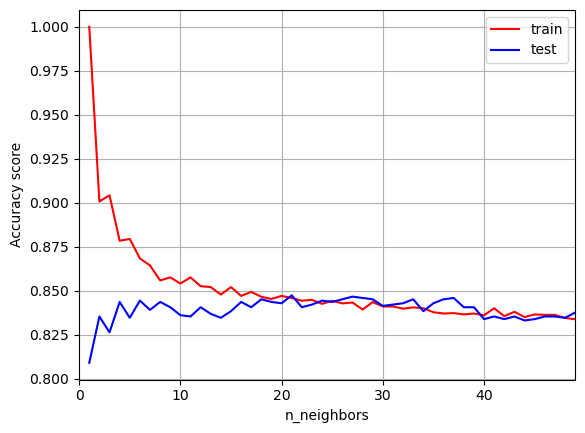

In [278]:
# Plot the accuracies
plt.figure()
plt.plot(neighbors, train_acc_rob, c='red', label='train')
plt.plot(neighbors, test_acc_rob, c='blue', label='test')
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy score")
plt.legend()
plt.grid(True)
plt.xlim(0, max(neighbors))  # Adjust the x-axis limits
plt.show()

Overfitting between 1 and 17 values. Best accuracy values without overfitting was with 27 and 37 n_neighbors-values. A model with k = 27 will be analyzed.

In [279]:
# KNN that performed best on scaled data
# Instantiate the model
knn_rob = KNeighborsClassifier(n_neighbors=27)

# Fit the model
knn_rob.fit(X_train_rob, y_train)

# Store accuracy scores
knn_rob_train = knn_rob.score(X_train_rob, y_train)
knn_rob_test = knn_rob.score(X_test_rob, y_test)

# Score the model
print(f"Train Accuracy: {knn_rob_train}")
print(f"Test Accuracy: {knn_rob_test}")

Train Accuracy: 0.8432798395185557
Test Accuracy: 0.8466165413533835


In [280]:
scores_df.loc[scores_df.shape[0],:]=['KNN','Robust',knn_rob_train,knn_rob_test, round(runtime_knn_rob,2), '-----', '27', '-----', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,1.6,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.71,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.79,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,29.11,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,57.35,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,57.24,-----,30,-----,-----
7,KNN,Robust,0.84328,0.846617,61.74,-----,27,-----,-----


In [281]:
scores_df.loc[scores_df.shape[0],:]=['-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,1.6,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.71,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.79,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,29.11,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,57.35,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,57.24,-----,30,-----,-----
7,KNN,Robust,0.84328,0.846617,61.74,-----,27,-----,-----
8,-----,-----,-----,-----,-----,-----,-----,-----,-----


Implementing KNN resulted in a similar accuracy score when using various scalers compared to using the Logistic Regression model. The best combination achieved manually was KNN with scaled data using StandardScaler(), yielding a training accuracy score of 83.85% and a test accuracy score of 84.51%. These results were not only high but also avoided overfitting. Let's run a pipeline to see if better values can be found, and to develop a code that speeds up the entire process.

#### Pipeline

In [282]:
# Define the pipeline with models
pipelines = [
    ('MinMax + KNN', Pipeline([
        ('scaler', MinMaxScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Standard + KNN', Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', KNeighborsClassifier())
    ])),
    ('Robust + KNN', Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', KNeighborsClassifier())
    ]))
]

# Define parameter grids for grid search
param_grids = {
    'MinMax + KNN': {
        'scaler__feature_range': [(0, 1)],
        'classifier__n_neighbors': [10, 20, 30, 40, 42]
    },
    'Standard + KNN': {
        'scaler__with_mean': [True, False],
        'scaler__with_std': [True, False],
        'classifier__n_neighbors': [7, 10, 20, 30]
    },
    'Robust + KNN': {
        'scaler__quantile_range': [(25.0, 75.0)],
        'classifier__n_neighbors': [7, 10, 20, 27]
    }
}

# Dictionary to store best estimators and best hyperparameters
best_estimators = {}
best_hyperparameters = {}

# Perform grid search for each pipeline
for name, pipeline in pipelines:
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get best estimator and store in dictionary
    best_estimators[name] = grid_search.best_estimator_
    
    # Store best hyperparameters
    best_hyperparameters[name] = grid_search.best_params_
    
    # Train final model with best parameters and evaluate
    best_pipeline = grid_search.best_estimator_
    y_pred = best_pipeline.predict(X_test)
    
    # Print pipeline results
    print(f"Pipeline: {name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------")


Pipeline: MinMax + KNN
Best Parameters: {'classifier__n_neighbors': 20, 'scaler__feature_range': (0, 1)}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1078
           1       0.60      0.32      0.42       252

    accuracy                           0.83      1330
   macro avg       0.73      0.63      0.66      1330
weighted avg       0.81      0.83      0.81      1330

---------------------------------------------
Pipeline: Standard + KNN
Best Parameters: {'classifier__n_neighbors': 10, 'scaler__with_mean': True, 'scaler__with_std': True}
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      1078
           1       0.61      0.32      0.42       252

    accuracy                           0.83      1330
   macro avg       0.73      0.64      0.66      1330
weighted avg       0.81      0.83      0.81      1330

---------------------------------------------
Pipeline: Robust + KNN

- Best estimators

In [283]:
# Access the best estimator for a specific pipeline 
best_estimator_minmax_knn = best_estimators['MinMax + KNN']
best_estimator_standard_knn = best_estimators['Standard + KNN']
best_estimator_robust_knn = best_estimators['Robust + KNN']

print(f'Best estimator: {best_estimator_minmax_knn}')
print(f'Best estimator: {best_estimator_standard_knn}')
print(f'Best estimator: {best_estimator_robust_knn}')

Best estimator: Pipeline(steps=[('scaler', MinMaxScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=20))])
Best estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=10))])
Best estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', KNeighborsClassifier(n_neighbors=20))])


- Best Hyperparameters

In [210]:
# Access the best hyperparameters for a specific pipeline (e.g., 'Standard + KNN')
best_hyperparams_minmax_knn = best_hyperparameters['MinMax + KNN']
best_hyperparams_standard_knn = best_hyperparameters['Standard + KNN']
best_hyperparams_robust_knn = best_hyperparameters['Robust + KNN']

print("Best Hyperparameters for MinMax + KNN:", best_hyperparams_minmax_knn)
print("Best Hyperparameters for Standard + KNN:", best_hyperparams_standard_knn)
print("Best Hyperparameters for Robust + KNN:", best_hyperparams_robust_knn)

Best Hyperparameters for MinMax + KNN: {'classifier__n_neighbors': 20, 'scaler__feature_range': (0, 1)}
Best Hyperparameters for Standard + KNN: {'classifier__n_neighbors': 10, 'scaler__with_mean': True, 'scaler__with_std': True}
Best Hyperparameters for Robust + KNN: {'classifier__n_neighbors': 20, 'scaler__quantile_range': (25.0, 75.0)}


#### 3. Random Forest

#### Importing packages

In [72]:
pip install mlxtend

In [73]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

#### Fitting Random forest model to unscaled

In theory, Random Forest like Decision Tree shouldn't get affected by unscaled data because they split the data based on feature values, and the scale of those values doesn't alter the relative ordering of the data points along each feature.

In [74]:
# Instantiating model
random_forest_model = RandomForestClassifier(n_estimators=50 ) # setting max features is not needed here as our dataset only has 2 features.
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [75]:
# Instantiate lists to save scores in
decision_tree_train_scores = []
decision_tree_test_scores = []
# For each tree, score on train and test
for sub_tree in random_forest_model.estimators_:
    decision_tree_train_scores.append(sub_tree.score(X_train, y_train))
    decision_tree_test_scores.append(sub_tree.score(X_test, y_test))


- Accuracy

In [76]:
# printing accuracy
print(f"Performance on TRAIN data:\n"
      f"Average of Component Trees: {np.mean(decision_tree_train_scores)}\n"
      f"Train Accuracy: {random_forest_model.score(X_train, y_train)}")
print("----------------")
print(f"Performance on TEST data:\n"
      f"Average of Component Trees: {np.mean(decision_tree_test_scores)}\n"
      f"Test Accuracy: {random_forest_model.score(X_test, y_test)}")

Performance on TRAIN data:
Average of Component Trees: 0.9149197592778335
Train Accuracy: 0.9997492477432297
----------------
Performance on TEST data:
Average of Component Trees: 0.7694436090225564
Test Accuracy: 0.8443609022556391


Random Forest model is currently overfitting. Different values onf n_estimators will be tried. Balancing the data would be performed in the following steps.

#### Fitting Random Forest with **n_estimators = n**

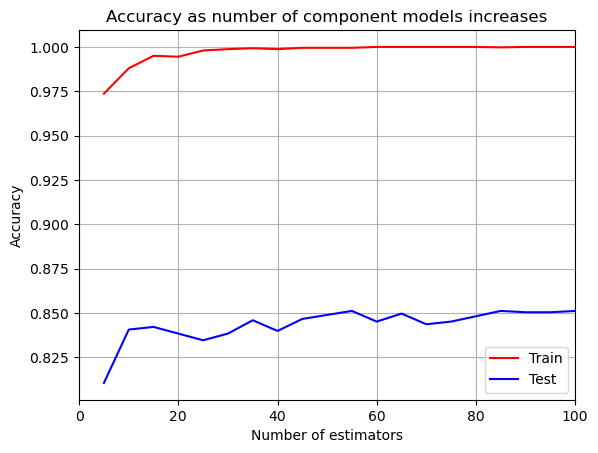

In [77]:
train_scores_n = []
test_scores_n = []
n_range = range(5, 101, 5)
for n in n_range:
    RF_model = RandomForestClassifier(n_estimators = n)
    RF_model.fit(X_train, y_train)
    train_scores_n.append(RF_model.score(X_train, y_train))
    test_scores_n.append(RF_model.score(X_test, y_test))
    
plt.plot(n_range, train_scores_n, label='Train', color='red')  # Change color for train line
plt.plot(n_range, test_scores_n, label='Test', color='blue')  
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xlim(0, max(n_range))  # Adjust the x-axis limits
plt.title("Accuracy as number of component models increases")
plt.legend()

- Accuracy for n_estimator = n

In [78]:
# printing accuracy
print(f"Performance on fitted data:\n"
      f"Average: {np.mean(train_scores_n)}\n"
      f"Train Accuracy with Random Forest: {random_forest_model.score(X_train, y_train)}")
print("----------------")
print(f"Performance on test data:\n"
      f"Average: {np.mean(test_scores_n)}\n"
      f"Test Accuracy with Random Forest: {random_forest_model.score(X_test, y_test)}")

Performance on fitted data:
Average: 0.997204112337011
Train Accuracy with Random Forest: 0.9997492477432297
----------------
Performance on test data:
Average: 0.8435714285714285
Test Accuracy with Random Forest: 0.8443609022556391


This model with unabalanced data displays overfitting. Before proceding trying different values for n_estimator the data will be balanced with

### ????????????????

In [79]:
train_score_n = random_forest_model.score(X_train, y_train)
test_score_n = random_forest_model.score(X_test, y_test)

scores_df.loc[scores_df.shape[0],:]=['Random Forest','Unscaled',train_score_n,test_score_n, '-----', '-----', '-----', 'n', '-----']
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.47,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.21,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.19,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,12.04,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,22.46,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,23.15,-----,30,-----,-----
7,KNN,Robust,0.84328,0.846617,24.19,-----,27,-----,-----
8,-----,-----,-----,-----,-----,-----,-----,-----,-----
9,Random Forest,Unscaled,0.999749,0.844361,-----,-----,-----,n,-----


####  Adjusting hyperparameters for Random Forest

- Adjusting n_estimators and max_depth

Based on the graphic with n_estimators = n, the values yielding the best accuracy were between 60 and 70. Evaluating all of them, the highest training and test accuracies were achieved with **n_estimators = 55** and **max_depth = 3**. Using a max_depth of 3 significantly reduced overfitting

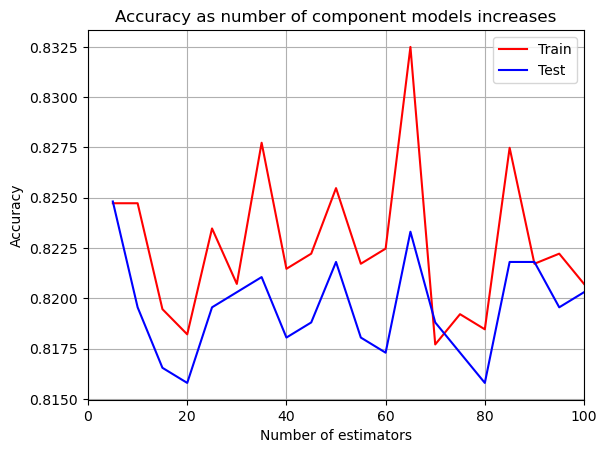

In [80]:
#### Fitting Random Forest with **n_estimators = 55** and **max_depth = 3**
train_scores_n55_d3 = []
test_scores_n55_d3 = []
n_range = range(5, 101, 5)
for n in n_range:
    RF_model = RandomForestClassifier(n_estimators = 55, max_depth = 3)
    RF_model.fit(X_train, y_train)
    train_scores_n55_d3.append(RF_model.score(X_train, y_train))
    test_scores_n55_d3.append(RF_model.score(X_test, y_test))

# print
plt.plot(n_range, train_scores_n55_d3, label='Train', color='red')  # Change color for train line
plt.plot(n_range, test_scores_n55_d3, label='Test', color='blue')  
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xlim(0, max(n_range))  # Adjust the x-axis limits
plt.title("Accuracy as number of component models increases")
plt.legend()

In [81]:
# printing accuracy
print(f"Performance on fitted data:\n"
      f"Average: {np.mean(train_scores_n55_d3)}\n"
      f"Train Accuracy with Random Forest: {random_forest_model.score(X_train, y_train)}")
print("----------------")
print(f"Performance on test data:\n"
      f"Average: {np.mean(test_scores_n55_d3)}\n"
      f"Test Accuracy with Random Forest: {random_forest_model.score(X_test, y_test)}")

Performance on fitted data:
Average: 0.8226178535606822
Train Accuracy with Random Forest: 0.9997492477432297
----------------
Performance on test data:
Average: 0.8195112781954886
Test Accuracy with Random Forest: 0.8443609022556391


Lower values in max_depth helpped to reduce overfitting when equal to 3. However, this lower value also reduces accuracy in both training and test data, and the model still displaying overfitting.

The hyperparameter min_samples_split will be added to improve this model.


In [82]:
train_scores_n55_d3 = random_forest_model.score(X_train, y_train)
test_scores_n55_d3 = random_forest_model.score(X_test, y_test)
scores_df.loc[scores_df.shape[0],:]=['Random Forest','Unscaled',train_scores_n55_d3,test_scores_n55_d3, '-----', '-----', '-----','55', '3',]
scores_df

,model,scaler,train,test,runtime,C-values,K-values,n_estimators,max_depth
0,Logistic,MinMaxScaler,0.822467,0.824812,0.47,100,-----,-----,-----
1,Logistic,Standard,0.822969,0.823308,0.21,1,-----,-----,-----
2,Logistic,Robust,0.822969,0.822556,0.19,1,-----,-----,-----
3,-----,-----,-----,-----,-----,-----,-----,-----,-----
4,KNN,Unscaled,0.84654,0.780451,12.04,-----,k,-----,-----
5,KNN,MinMax,0.835005,0.833835,22.46,-----,42,-----,-----
6,KNN,Standard,0.838516,0.845113,23.15,-----,30,-----,-----
7,KNN,Robust,0.84328,0.846617,24.19,-----,27,-----,-----
8,-----,-----,-----,-----,-----,-----,-----,-----,-----
9,Random Forest,Unscaled,0.999749,0.844361,-----,-----,-----,n,-----


- Adding hyperparameter **min_samples_split** to Random Forest with **n_estimators = 55** and **max_depth = 3**

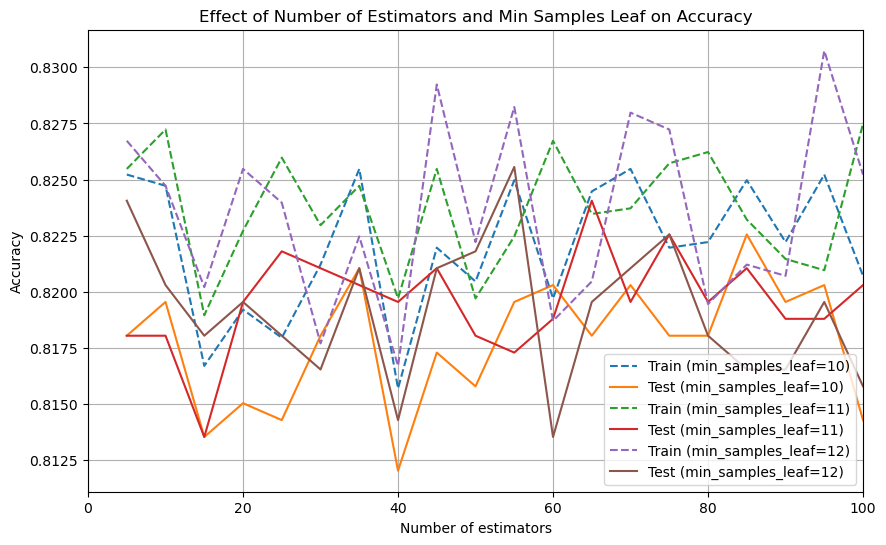

In [83]:
# Initialize lists to store training and test scores
train_scores_n55_d3_min = []
test_scores_n55_d3_min = []

# Define parameter ranges
n_range = range(5, 101, 5)
min_samples_leaf_values = [10,11,12]  # Define different values for min_samples_leaf

# Loop over different values of n_estimators and min_samples_leaf
for min_samples_leaf in min_samples_leaf_values:
    train_scores_min_samples = []
    test_scores_min_samples = []
    
    for n in n_range:
        # Initialize RandomForestClassifier with specified parameters
        RF_model = RandomForestClassifier(n_estimators=55, max_depth=3, min_samples_leaf=min_samples_leaf)
        
        # Fit model on training data
        RF_model.fit(X_train, y_train)
        
        # Compute training and test accuracy
        train_accuracy = RF_model.score(X_train, y_train)
        test_accuracy = RF_model.score(X_test, y_test)
        
        # Append scores to lists
        train_scores_min_samples.append(train_accuracy)
        test_scores_min_samples.append(test_accuracy)
    
    # Append the scores for this min_samples_leaf value to the main lists
    train_scores_n55_d3_min.append(train_scores_min_samples)
    test_scores_n55_d3_min.append(test_scores_min_samples)

# Plotting the results
plt.figure(figsize=(10, 6))

for i, min_samples_leaf in enumerate(min_samples_leaf_values):
    plt.plot(n_range, train_scores_n55_d3_min[i], label=f'Train (min_samples_leaf={min_samples_leaf})', linestyle='--')
    plt.plot(n_range, test_scores_n55_d3_min[i], label=f'Test (min_samples_leaf={min_samples_leaf})')

plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xlim(0, max(n_range))
plt.title("Effect of Number of Estimators and Min Samples Leaf on Accuracy")
plt.legend()
plt.show()


min_sample_leave = 11 display the highest accuracy, however overfitting still noticeable.

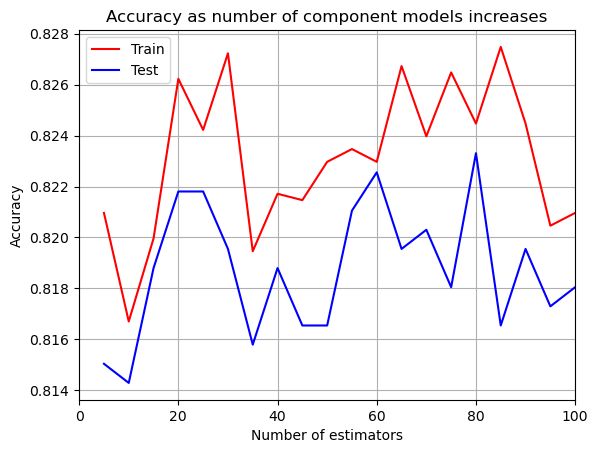

In [84]:
# Fitting Random Forest with **n_estimators = 5** and **max_depth = 1**
train_scores_n55_d3_min = []
test_scores_n55_d3_min = []
n_range = range(5, 101, 5)
for n in n_range:
    RF_model = RandomForestClassifier(n_estimators = 55, max_depth = 3, min_samples_leaf=11)
    RF_model.fit(X_train, y_train)
    train_scores_n55_d3_min.append(RF_model.score(X_train, y_train))
    test_scores_n55_d3_min.append(RF_model.score(X_test, y_test))

# print
plt.plot(n_range, train_scores_n55_d3_min, label='Train', color='red')  # Change color for train line
plt.plot(n_range, test_scores_n55_d3_min, label='Test', color='blue')  
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xlim(0, max(n_range))  # Adjust the x-axis limits
plt.title("Accuracy as number of component models increases")
plt.legend()

In [85]:
# printing accuracy
print(f"Performance on fitted data:\n"
      f"Average: {np.mean(train_scores_n50_d1)}\n"
      f"Train Accuracy with Random Forest: {random_forest_model.score(X_train, y_train)}")
print("----------------")
print(f"Performance on test data:\n"
      f"Average: {np.mean(test_scores_n50_d1)}\n"
      f"Test Accuracy with Random Forest: {random_forest_model.score(X_test, y_test)}")

NameError: name 'train_scores_n50_d1' is not defined